# How Does a Country Become Happy?

#### Group Tableau

Members:
- Buhion, Deborah Rose
- Dela Cruz, Alexis Louis
- Dizon, Michaela Nicole
- Go, Thea Ellen
- Oafallas, Kenneth Neil

# 1. Introduction

A year into the pandemic, we look back at disease, conflict, and authoritarianism. Frankly speaking, it hasn’t been a good year. But being down means we have the opportunity to rise up. It is now most relevant to ask the question “How does a country become happy?”

This notebook will explore several factors that affect the happiness score of countries. We will be using data from two sources: **World Happiness Report 2021**, and **Varieties of Democaracy (V-Dem)**. Further information on the datasets will be discussed in thier respective sections below. In this notebook, five exploratory questions will be explored in addition to one inferential data analysis question.

## 1.1 Research Questions

Generally, we aim to answer the question: How does a country become happy?

Specifically, we aim to answer the following questions: 

1. (Exploratory) Is the trend of global happiness going upwards or downwards over the years?
2. (Exploratory) What is the relationship between happiness and generosity?
3. (Exploratory) What is the relationship between happiness and democracy?
4. (Exploratory) What is the relationship between democracy and degree of freedom?
5. (Exploratory) What is the relationship between a country’s GDP and happiness?
6. (Inferential) Is the rate of change in happiness as Social Support changes the same as the rate of change in happiness as Liberal Democracy index?

## 1.2 Datasets

These are the datasets that will be used in this notebook:


**World Happiness Report 2021 Dataset**<br>
Link: https://www.kaggle.com/mathurinache/world-happiness-report-2021

The World Happiness Report 2021 contains survey data on the state of global happiness or Happiness Score of 153 countries based on different factors like healthy life expectancy, social support, country GDP, freedom to make life choices, as well as other factors. The Happiness Score is obtained as a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. The GWP surveys a sample size of at least 1000 people from each of the 153 countries. The samples obtained are nationally representative of the resident population aged 15 and older.

The Happiness Score is explained by the following factors:

1. GDP per capita
2. Healthy Life Expectancy
3. Social support
4. Freedom to make life choices
5. Generosity
6. Corruption Perception
7. Residual error

The Happiness Score is documented to have a value from 0 to 10, with 10 being most happy. The factors are continuous values from 0 to 1, with 1 being the most positive score.


**V-Dem Dataset Version 11.1**<br>
Link: https://www.v-dem.net/en/data/data/v-dem-dataset-v111/

The V-Dem dataset contains 771 factors and indices regarding democracy informed through expert-coding. Over 3,500 country experts are recruited to provide their judgment on different democracy concepts and cases. Each factor or index is informed by 5 experts on the matter. Bayesian Item-Response Theory (IRT) Estimation Strategy is used to account for the subjectivity of expert-coding.

This project focuses on the 5 indices of democracy at the most abstract level (electoral, liberal, participatory, deliberative, and egalitarian) as a means of measurement V-Dem refers to as **High-level Democracy Indices**. These indices group together more specific, lower-level indices that describe features of democracy, and provide insights on the general state of democracy in a country.

Here are the columns for the High-level Democracy Indices:

1. Electoral democracy index (v2x_polyarchy)
2. Liberal democracy index (v2x_libdem)
3. Deliberative democracy index (v2x_delibdem)
4. Egalitarian democracy index (v2x_egaldem)
5. Participatory democracy index (v2x_partipdem)

The indices are continuous values from 0 to 1, with 1 being the most democratic score. They use the same scale as the factors for happiness, and thus are compatible for analysis without prerequisite normalization or standardization.

## 1.3 Packages

Let us first import the packages that we will be using in this notebook.

In [1]:
# import packages
import os
import math
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2. Data

## 2.1 Loading the Datasets

Now, let us load the data using `pandas`. The read_csv function will read the data from the `.csv` files, then store them into a `DataFrame`.

### World Happiness Dataset

The datasets are loaded into dataframes from CSV files. After loading the data into the dataframes, they are renamed so that it ca be merged with the other dataset. `Country name` and `year` in particular will be renamed to use the convention where words in a title are capitalized and separated by a space.

In [2]:
# load data
happiness_df = pd.read_csv('./datasets/DataPanelWHR2021C2.csv')

# rename columns
happiness_df.rename(columns = {'Country name' : 'Country Name', 'year' : 'Year'}, inplace = True)
happiness_df.head()

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,"3,724","7,370","0,451","50,800","0,718","0,168","0,882","0,518","0,258"
1,Afghanistan,2009,"4,402","7,540","0,552","51,200","0,679","0,190","0,850","0,584","0,237"
2,Afghanistan,2010,"4,758","7,647","0,539","51,600","0,600","0,121","0,707","0,618","0,275"
3,Afghanistan,2011,"3,832","7,620","0,521","51,920","0,496","0,162","0,731","0,611","0,267"
4,Afghanistan,2012,"3,783","7,705","0,521","52,240","0,531","0,236","0,776","0,710","0,268"


### V-Dem Dataset


The same procedure will be used to load the V-Dem dataset. To answer the research question, the relevant columns are the Country Name, Year, and the 5 high-level indices. To save computational time and memory, these columns will be selected from the entire dataset, with the other columns dropped. The relevant columns are then renamed, with `country_name` and `year` renamed following a similar convention with the World Happiness dataset so that the two can be merged later on.

In [3]:
# load data
vdem_df = pd.read_csv('./datasets/V-Dem-CY-Core-v11.1.csv')

# get relevant columns
col = ["country_name", "year", "v2x_polyarchy", "v2x_libdem", "v2x_partipdem", "v2x_delibdem", "v2x_egaldem"]
vdem_df = vdem_df[col]

# rename columns
vdem_df.rename(
    columns = {
        'country_name' : 'Country Name', 
        'year' : 'Year', 
        'v2x_polyarchy' : "Electoral",
        'v2x_libdem' : "Liberal",
        'v2x_partipdem' : "Participatory",
        'v2x_delibdem' : "Deliberative",
        'v2x_egaldem' : "Egalitarian"
    }, 
    inplace = True
)

vdem_df.head()

,Country Name,Year,Electoral,Liberal,Participatory,Deliberative,Egalitarian
0,Mexico,1789,0.026,0.041,0.007,NaN,NaN
1,Mexico,1790,0.026,0.041,0.007,NaN,NaN
2,Mexico,1791,0.026,0.041,0.007,NaN,NaN
3,Mexico,1792,0.026,0.041,0.007,NaN,NaN
4,Mexico,1793,0.026,0.041,0.007,NaN,NaN


To make the time series data compatible, only the intersection of years present in both datasets will be considered for the project. The minimum and maximum year values for both datasets will be obtained.

In [4]:
print("World Happiness Dataset")
# Maximum year for World Happiness Dataset
print("Max Year: " + str(happiness_df["Year"].max()))
# Minimum year for World Happiness Dataset
print("Min Year: " + str(happiness_df["Year"].min()))

World Happiness Dataset
Max Year: 2020
Min Year: 2005


In [5]:
print("V-Dem Dataset")
# Maximum year for V-Dem Dataset
print("Max Year: " + str(vdem_df["Year"].max()))
# Minimum year for V-Dem Dataset
print("Min Year: " + str(vdem_df["Year"].min()))

V-Dem Dataset
Max Year: 2020
Min Year: 1789


Both datasets contain dataup to 2020. The World Happiness dataset however only go as early as 2005. The V-Dem dataset, on the other hand, contains historical data as early 1789. To make the datasets compatible, and to reduce processing time and memory requirements going forward into data cleaning and wrangling, records in the V-Dem dataset before 2005 will be dropped in this phase.

In [6]:
vdem_df = vdem_df[(vdem_df["Year"] >= 2005) & (vdem_df["Year"] <= 2020)]
vdem_df.head()

,Country Name,Year,Electoral,Liberal,Participatory,Deliberative,Egalitarian
216,Mexico,2005,0.701,0.504,0.436,0.563,0.370
217,Mexico,2006,0.672,0.480,0.416,0.538,0.352
218,Mexico,2007,0.647,0.459,0.399,0.533,0.340
219,Mexico,2008,0.642,0.457,0.398,0.529,0.337
220,Mexico,2009,0.645,0.460,0.398,0.531,0.336


## 2.2 Data Wrangling

### Information on the data (data types, representations, null values)

To understand the data more, we use the df.info() function to get the non-null count and datatypes of each column in the dataframes.

In [7]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country Name                      1949 non-null   object
 1   Year                              1949 non-null   int64 
 2   Life Ladder                       1949 non-null   object
 3   Log GDP per capita                1913 non-null   object
 4   Social support                    1936 non-null   object
 5   Healthy life expectancy at birth  1894 non-null   object
 6   Freedom to make life choices      1917 non-null   object
 7   Generosity                        1860 non-null   object
 8   Perceptions of corruption         1839 non-null   object
 9   Positive affect                   1927 non-null   object
 10  Negative affect                   1933 non-null   object
dtypes: int64(1), object(10)
memory usage: 167.6+ KB


Columns 2 to 10 have the datatype "object", and are not the expected datatype float64. Looking at the records shown in data loading, these columns are coded as Strings, using commas as decimal points for convention. The non-null values in some columns also do not match the total number of records.

In [8]:
vdem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 216 to 25801
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   2856 non-null   object 
 1   Year           2856 non-null   int64  
 2   Electoral      2856 non-null   float64
 3   Liberal        2856 non-null   float64
 4   Participatory  2856 non-null   float64
 5   Deliberative   2856 non-null   float64
 6   Egalitarian    2856 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 178.5+ KB


Every column in vdem_df has no null values. The columns are also the expected datatype, particularly the indices which are float64.

### Converting Data Types

To convert the String object representations for the score in happiness_df t float64, a function **to_num** is defined. It replaces the commas in the strings with decimal points, and coerces the string into a numeric datatype. It takes the dataframe and the concerned column as parameters.

In [9]:
def to_num(data, col):
    data[col] = [str(x).replace(',','.') for x in data[col]]
    return pd.to_numeric(data[col], errors='coerce')

The function will be iterated over the relevant columns of happiness_df 

In [10]:
for column in happiness_df.iloc[:, 2:11]:
    happiness_df[column] = to_num(happiness_df, column)

Let us check again the datatype information of happiness_df.

In [11]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country Name                      1949 non-null   object 
 1   Year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [12]:
happiness_df.head()

The columns with the happiness scores have been successfully converted to float64 datatype.

### Checking for duplicates

Duplicates are checked using the df.duplicated() function. Since the datasets contain time series data by year, each combination of country and year should only appear once, and thus there should be duplicates.

In [13]:
print("Happiness Duplicated Records: ", happiness_df.duplicated().sum() )
print("V-Dem Duplicated Records: ", vdem_df.duplicated().sum() )

Happiness Duplicated Records:  0
V-Dem Duplicated Records:  0


From what we can see above, there are no duplicates in the data as expected.

### Checking for null values

Null values are checked using the df.isna() function. While checking information on the data in the previous sections, it was established that vdem_df does not contain any null values in any column.

In [14]:
vdem_df.isna().sum()

Country Name     0
Year             0
Electoral        0
Liberal          0
Participatory    0
Deliberative     0
Egalitarian      0
dtype: int64

happiness_df however does contain null values. Each column also has a different number of null values, so it is unlikely that the null values belong in the same record.

In [15]:
happiness_df.isna().sum()

Country Name                          0
Year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

The missing values will be filled using forward fill `df.ffill()`. To account for events wherein the first value is missing and cannot be filled with forward fill, backwards fill `df.bfill` will also be performed. Because forward fill will be performed first, all missing values except for those without any preceding data will be filled with forward fill.

Forward fill and backwards fill cannot be used directly on the merged dataset however, because data from other countries may be used to fill missing values in other countries. To address this, filling will be performed on slices of the dataset for each country. A list of unique countries will be obtained. Then, we will iterate over the list to obtain slices of the dataset for each country. Missing values will be filled will in these slices to ensure that data from other countries are not used to fill.

In [16]:
# get unique country names in happiness_df
h_unique = happiness_df["Country Name"].unique()

In [17]:
# iterate filling over each country slice
for country in h_unique:
    # create slice to fill
    temp = happiness_df[happiness_df["Country Name"] == country]

    # remove slice to remove duplicates
    happiness_df = happiness_df[happiness_df["Country Name"] != country]

    # fill missing values, performing forward fill first
    temp = temp.ffill()
    temp = temp.bfill()

    # append filled slice to dataset
    happiness_df = happiness_df.append(temp)

Let us check if there are still missing values.

In [18]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country Name                      1949 non-null   object 
 1   Year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1930 non-null   float64
 4   Social support                    1948 non-null   float64
 5   Healthy life expectancy at birth  1913 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1930 non-null   float64
 8   Perceptions of corruption         1921 non-null   float64
 9   Positive affect                   1947 non-null   float64
 10  Negative affect                   1948 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 182.7+ KB


Surprisingly, there still exist missing values. Let us look at what the records with missing values look like. Records with missing values in `Log GDP per capita` will be checked as an example.

In [19]:
happiness_df[happiness_df["Log GDP per capita"].isna()]

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
423,Cuba,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
1280,North Cyprus,2012,5.463,NaN,0.871,NaN,0.693,NaN,0.855,0.709,0.405
1281,North Cyprus,2013,5.567,NaN,0.869,NaN,0.775,NaN,0.715,0.622,0.443
1282,North Cyprus,2014,5.786,NaN,0.802,NaN,0.830,NaN,0.692,0.724,0.311
1283,North Cyprus,2015,5.843,NaN,0.791,NaN,0.785,NaN,0.659,0.702,0.319
1284,North Cyprus,2016,5.827,NaN,0.808,NaN,0.796,NaN,0.670,0.644,0.346
1285,North Cyprus,2018,5.608,NaN,0.837,NaN,0.797,NaN,0.614,0.480,0.262
1286,North Cyprus,2019,5.467,NaN,0.803,NaN,0.793,NaN,0.640,0.494,0.296
1559,Somalia,2014,5.528,NaN,0.611,49.60,0.874,NaN,0.456,0.834,0.207
1560,Somalia,2015,5.354,NaN,0.599,50.10,0.968,NaN,0.410,0.901,0.187


Let us take a closer look at Somalia in particular to understand why missing values were not filled for this country.

In [20]:
happiness_df[happiness_df["Country Name"] == "Somalia"]

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1559,Somalia,2014,5.528,NaN,0.611,49.6,0.874,NaN,0.456,0.834,0.207
1560,Somalia,2015,5.354,NaN,0.599,50.1,0.968,NaN,0.410,0.901,0.187
1561,Somalia,2016,4.668,NaN,0.594,50.0,0.917,NaN,0.441,0.891,0.193


It turns out that some countries have columns where all values are missing. This prevents forward fill or backwards fill from working because there is no prior data to sample from. Missing values for these countries cannot be filled. To prevent errors in data analysis, records for these countries will be dropped.

In [21]:
happiness_df = happiness_df.dropna(axis=0)

In [22]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country Name                      1878 non-null   object 
 1   Year                              1878 non-null   int64  
 2   Life Ladder                       1878 non-null   float64
 3   Log GDP per capita                1878 non-null   float64
 4   Social support                    1878 non-null   float64
 5   Healthy life expectancy at birth  1878 non-null   float64
 6   Freedom to make life choices      1878 non-null   float64
 7   Generosity                        1878 non-null   float64
 8   Perceptions of corruption         1878 non-null   float64
 9   Positive affect                   1878 non-null   float64
 10  Negative affect                   1878 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 176.1+ KB


happiness_df does not

### Data Representations

Since the datasets will be merged on the `Country Name` and `Year` column, it is important that the values that refer to the same real-world entity are represented the same way. Let us first look at the years. The unique Year values can be obtained using `pd.unique()` function. Since the range of years is only from 2005 to 2020, the unique values can be visually inspected.

In [23]:
happiness_df["Year"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005])

In [24]:
vdem_df["Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

Both happiness_df and vdem_df contain all year values from 2005 to 2020 as integers, and are represented the same.

Country names however can't be visually inspected effectively, considering happiness_df has 155 unique values and vdem_df has 179 unique values on the `Country Name` column. The different representations have to be obtained programmatically.

In [25]:
h_unique = pd.DataFrame(happiness_df["Country Name"].unique())
v_unique = pd.DataFrame(vdem_df["Country Name"].unique())
print(h_unique.count())
print(v_unique.count())

0    155
dtype: int64
0    179
dtype: int64


We can obtain the representations present in one dataframe but not in another through set subtraction. Set subtraction can be simulated by concatenating the subtrahend set to the minuend set twice, then removing all duplicated entries. Elements present in both sets will be removed since they are duplicated. This will also remove all elements from the subtrahend set since it was concatenated twice and guaranteed duplicate. This leaves only the representations unique to the minuend set.

Let us perform these operations to get country name representations unique to happiness_df.

In [26]:
only_happiness = pd.concat([h_unique, v_unique, v_unique]).drop_duplicates(keep=False)
only_happiness

,0
13,Belize
31,Congo (Brazzaville)
32,Congo (Kinshasa)
48,Gambia
96,Myanmar
107,Palestinian Territories
131,Swaziland
135,Taiwan Province of China
147,United States


There are 12 country name representations in happiness_df not present in vdem_df. Let us perform the same operations for vdem_df.

In [27]:
only_vdem = pd.concat([v_unique, h_unique, h_unique]).drop_duplicates(keep=False)
only_vdem

,0
7,Burma/Myanmar
15,United States of America
26,South Sudan
34,North Korea
36,Kosovo
41,Taiwan
63,Cape Verde
67,Timor-Leste
81,Maldives
86,Papua New Guinea


There are 25 country name representations in vdem_df not present in happiness_df. Notice that some of the representations refer to the same country such as `United States` in happiness_df and `United States of America` in vdem_df. For this project, representations in the V-Dem dataset will be used. To replace the representations in happiness_df, the `df.replace()` function is used. A dictionary containing country names in happiness_df matched to their counterparts in vdem_df is created as parameter to the aforementioned function. 

Notice that though Palestinian Territories is present in happiness_df, it is split into two representations in vdem_df, with the West Bank and Gaza Strip having different sets of scores. As such, this represntation will not be replaced.

In [28]:
country_dict = {
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Gambia": "The Gambia",
    "Myanmar": "Burma/Myanmar",
    "Swaziland": "Eswatini",
    "Taiwan Province of China": "Taiwan",
    "United States": "United States of America"
}

In [29]:
happiness_df["Country Name"] = happiness_df["Country Name"].replace(country_dict)

There will still however be countries without counterparts in the datasets, present only in one as shown below. Here are countries unique to happiness_df even after making the representations the same.

In [30]:
h_unique = pd.DataFrame(happiness_df["Country Name"].unique())
v_unique = pd.DataFrame(vdem_df["Country Name"].unique())
only_happiness = pd.concat([h_unique, v_unique, v_unique]).drop_duplicates(keep=False)
only_happiness

,0
13,Belize
107,Palestinian Territories


When merging the datasets, including records for these countries will create records with many null values. Thus, they will not be included in the merged dataset. To achieve this, an inner join is used to include only Country Name and Year combinations present in both datasets.

In [31]:
main_df = pd.merge(happiness_df, vdem_df, on=['Country Name','Year'], how='inner')
main_df.head()

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Electoral,Liberal,Participatory,Deliberative,Egalitarian
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0.403,0.228,0.160,0.346,0.232
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,0.391,0.226,0.158,0.339,0.231
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,0.374,0.222,0.151,0.331,0.224
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,0.375,0.223,0.151,0.336,0.225
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,0.380,0.224,0.154,0.338,0.226


Let us check information of the merged dataset `main_df`

In [32]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 1861
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country Name                      1862 non-null   object 
 1   Year                              1862 non-null   int64  
 2   Life Ladder                       1862 non-null   float64
 3   Log GDP per capita                1862 non-null   float64
 4   Social support                    1862 non-null   float64
 5   Healthy life expectancy at birth  1862 non-null   float64
 6   Freedom to make life choices      1862 non-null   float64
 7   Generosity                        1862 non-null   float64
 8   Perceptions of corruption         1862 non-null   float64
 9   Positive affect                   1862 non-null   float64
 10  Negative affect                   1862 non-null   float64
 11  Electoral                         1862 non-null   float64
 12  Libera

This will be the dataset used to answer the research questions. There are 1862 records with no null values. The scores are also all in float64, allowing them to be potentially correlated and used compatibly with each other.

## 3. Exploratory Questions

### 3.1 Is the trend of global happiness going upwards or downwards over the years?

To understand the world’s happiness, we first want to look at if the global happiness has been going up or down over the years. To do this, first check how many countries have records in each year.

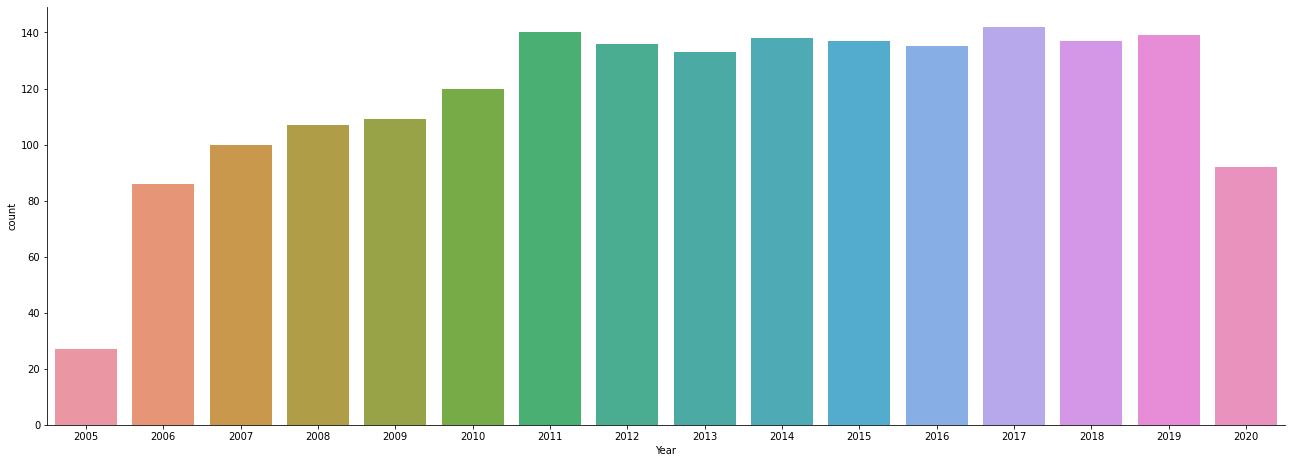

In [33]:
year_distrib_plot = sns.catplot(x="Year", kind="count", data=happiness_df)
year_distrib_plot.fig.set_size_inches(20, 6.5)

Notice that 2005 has a low country count compared to the other years, which may result in an outlier mean depending on the distribution. It is likely that countries in 2005 are from wealthy countries whose data was accessible.

We  then took the average of all countries in each year to get a global happiness score and plotted it onto a line graph. 


In [34]:
yearly_happiness = main_df.groupby('Year', as_index=False).agg(
    Happiness=('Life Ladder', 'mean')
)
yearly_happiness

,Year,Happiness
0,2005,6.446259
1,2006,5.203753
2,2007,5.429541
3,2008,5.435330
4,2009,5.466694
5,2010,5.519084
6,2011,5.426029
7,2012,5.453059
8,2013,5.393068
9,2014,5.398110


(array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


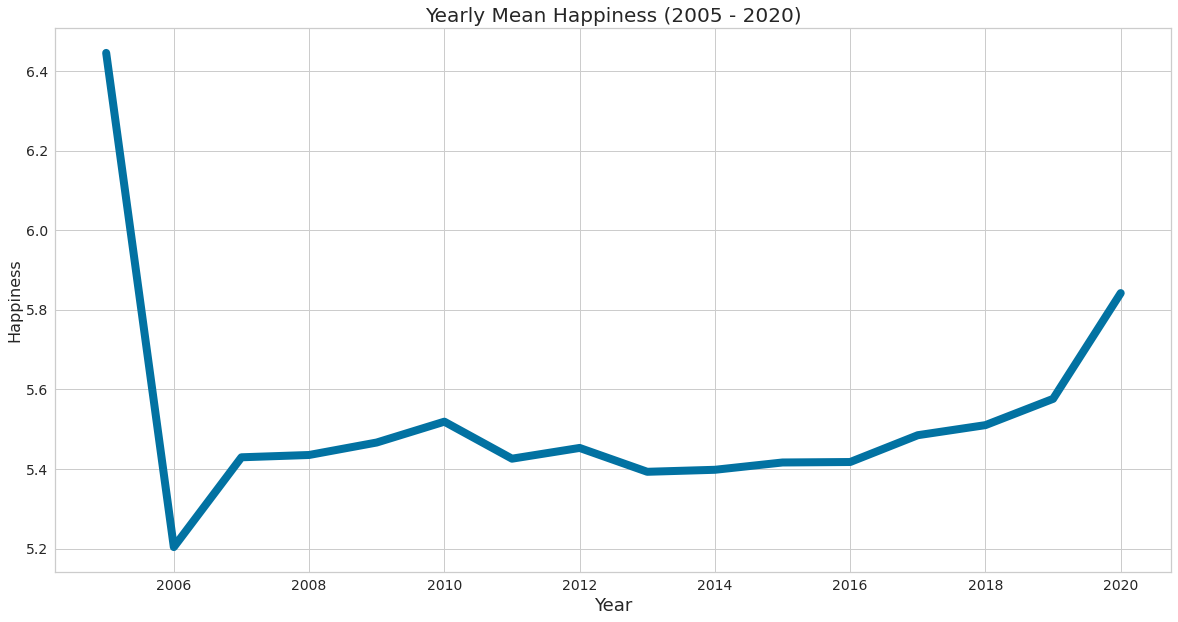

In [84]:
fig, ax = pyplot.subplots(figsize=(20, 10))
yearly_happiness_plot = sns.lineplot(data=yearly_happiness, x="Year", y="Happiness", linewidth = 8)
yearly_happiness_plot.set_title('Yearly Mean Happiness (2005 - 2020)', size=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Happiness", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

As expected, the mean happiness score for the year 2005 is an outlier which is caused by having a significantly smaller number of records. Hence, it will be excluded in this EDA.

In [36]:
without_2005 = yearly_happiness[yearly_happiness['Year'] != 2005]
without_2005['Year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

We plot the dat again using the data without 2005.

(array([5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

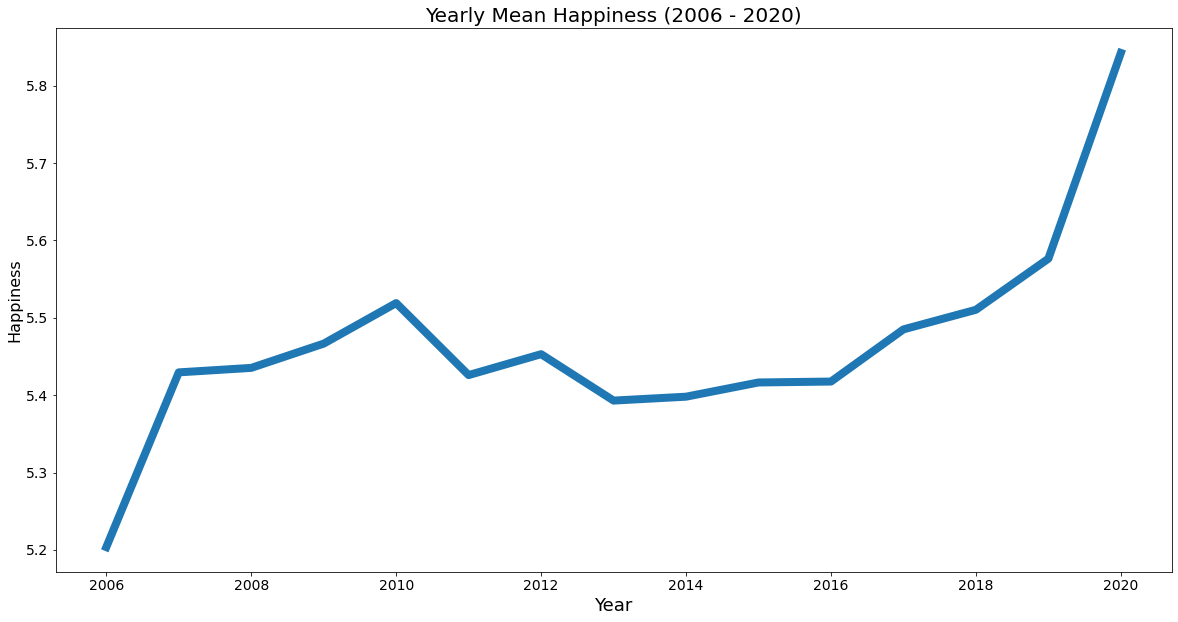

In [37]:
fig, ax = pyplot.subplots(figsize=(20, 10))
without_2005_plot = sns.lineplot(data=without_2005, x="Year", y="Happiness", linewidth = 8)
without_2005_plot.set_title('Yearly Mean Happiness (2006 - 2020)', size=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Happiness", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Based on the graph, there was an increase in happiness from 2006 to 2010. The world however underwent a period when happiness was at a decline from 2010 to 2013 Still, from 2013 onwards, global happiness has been steadily trending upwards, so people have become happier in the last 8 years. The answer to our research questions may help keep this trend going.


### 3.2 What is the relationship between happiness and generosity?

Several factors affect the happiness score of a country including their **GDP**, **Life Expectancy**, **Freedom to make life choices**, and **Social Support** among other factors. It makes sense for a country with an adquate amount of resources to have a higher happiness score. If a country has a shourtage of resources, they might less likey be generous with said resources. However, if a country were to have a surplus of resources, they are more likely to be more flexible towards the dissemination of these resources. We want to know if the happiness of a country affects how generous it is.

To avoid modifying the data, let us isolate the columns that are needed in a new dataframe.

In [38]:
happiness_generosity_df = main_df[['Life Ladder', 'Generosity']]
happiness_generosity_df.head()

,Life Ladder,Generosity
0,3.724,0.168
1,4.402,0.190
2,4.758,0.121
3,3.832,0.162
4,3.783,0.236


Let us make sure there are no null values.

In [39]:
happiness_generosity_df.isna().sum()

Life Ladder    0
Generosity     0
dtype: int64

Now that all the datapoints are complete, we will create a scatterpolt to show the relationship of **generosity** (y coordinate), and **happiness score** (x coordinate). A regression line will be used to show the trend of the data.

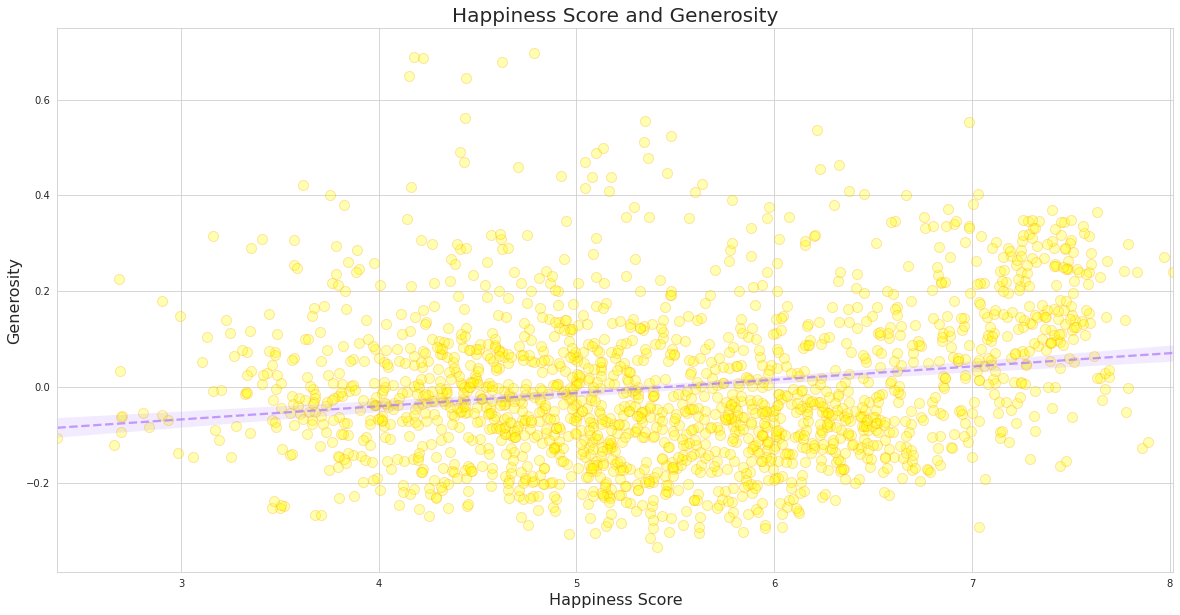

In [40]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# create a scatterplot using a country's generosity and their respective happiness scores
happiness_generosity_plot = sns.scatterplot(
    data=happiness_generosity_df, 
    ax=ax,
    x='Life Ladder', 
    y='Generosity',
    alpha=0.3,
    s=100,
    linewidth=1,
    edgecolor='orange',
    color='yellow'
)

# plot a regression line to show the trend
sns.regplot(
    x='Life Ladder', 
    y='Generosity', 
    data=happiness_generosity_df, 
    scatter=False, 
    color='#ad75fa', #ad75fa
    line_kws={'ls':'--', 'alpha':0.7}
)

happiness_generosity_plot.set_title('Happiness Score and Generosity', fontsize=20)
happiness_generosity_plot.set_xlabel('Happiness Score', fontsize=16)
happiness_generosity_plot.set_ylabel('Generosity', fontsize=16)
plt.show()

From what we can observe above, there is a slight positive trend to happiness score and generosity. As the happiness score increases, so does generosity. However, the datapoints are still very scattered around the plot, and the slope of the regression line is not very steep. While it may not be strongly correlated, we can still say that there is a slight positive correlation between a country's happiness score and generosity.

### 3.3 What is the relationship between happiness and democracy?

First of all, what is democracy?
`definition`
<br><br>
`real life examples`
<br>
example: having the right to vote for the people who you trust to be great leaders is democracy

According to V-dem, democracy is divided into the following components:

1. Electoral
2. Liberal
3. Participatory
4. Deliberative
5. Egalitarian

The V-dem dataset includes a score from 0.0 to 1.0 for each democracy component of each country in a certain year.

In [41]:
happiness_democracy_df = main_df[['Country Name', 'Year', 'Life Ladder', 'Electoral', 'Liberal', 'Participatory', 'Deliberative','Egalitarian']]
happiness_democracy_df.head()

,Country Name,Year,Life Ladder,Electoral,Liberal,Participatory,Deliberative,Egalitarian
0,Afghanistan,2008,3.724,0.403,0.228,0.160,0.346,0.232
1,Afghanistan,2009,4.402,0.391,0.226,0.158,0.339,0.231
2,Afghanistan,2010,4.758,0.374,0.222,0.151,0.331,0.224
3,Afghanistan,2011,3.832,0.375,0.223,0.151,0.336,0.225
4,Afghanistan,2012,3.783,0.380,0.224,0.154,0.338,0.226


There are different ranges of years recorded for each country. For example, Afghanistan only has record for the years 2008 to 2019 while Spain has record for the years 2005 to 2020

In [42]:
years_afghanistan = happiness_democracy_df[happiness_democracy_df['Country Name'] == 'Afghanistan']['Year']
years_spain = happiness_democracy_df[happiness_democracy_df['Country Name'] == 'Spain']['Year']
print(years_afghanistan)
print(years_spain)

0     2008
1     2009
2     2010
3     2011
4     2012
5     2013
6     2014
7     2015
8     2016
9     2017
10    2018
11    2019
Name: Year, dtype: int64
1523    2005
1524    2007
1525    2008
1526    2009
1527    2010
1528    2011
1529    2012
1530    2013
1531    2014
1532    2015
1533    2016
1534    2017
1535    2018
1536    2019
1537    2020
Name: Year, dtype: int64


In [43]:
# re-check for null values before plotting
happiness_democracy_df.isna().sum()

Country Name     0
Year             0
Life Ladder      0
Electoral        0
Liberal          0
Participatory    0
Deliberative     0
Egalitarian      0
dtype: int64

To see the relationship between happiness score (Life Ladder) and democracy indices, we plot each record of each country for all years recorded for that country and draw the line of best fit using linear regression.

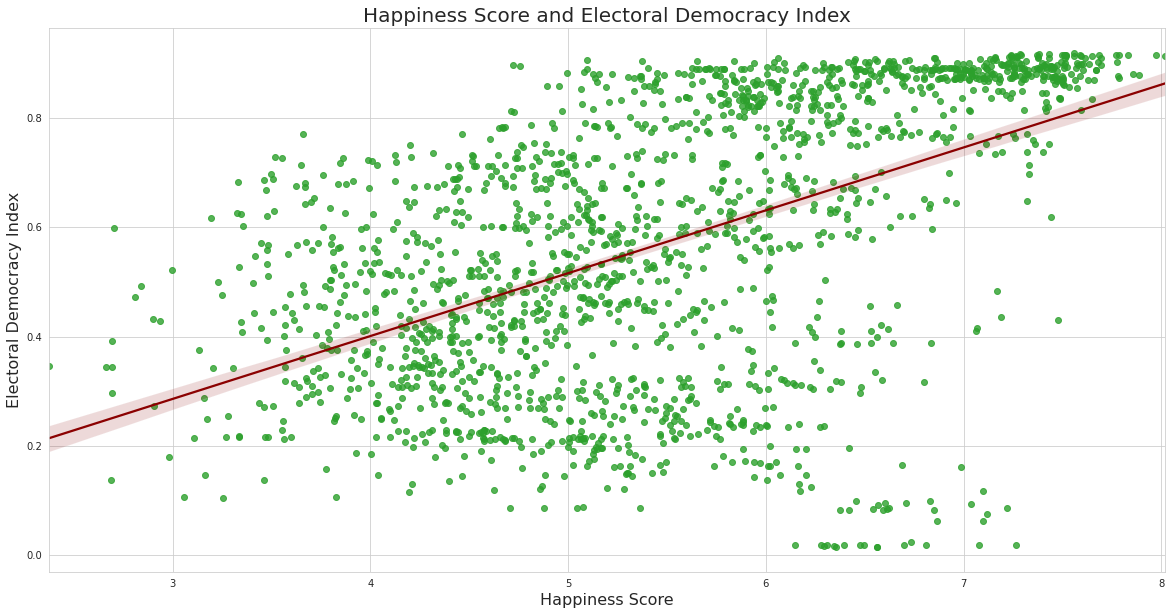

In [44]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
happiness_electoral_plot = sns.regplot(
    x='Life Ladder', 
    y='Electoral', 
    data=happiness_democracy_df, 
    scatter=True, 
    color='tab:green',
    line_kws={'color':'darkred'}
)

happiness_electoral_plot.set_title('Happiness Score and Electoral Democracy Index', fontsize=20)
happiness_electoral_plot.set_xlabel('Happiness Score', fontsize=16)
happiness_electoral_plot.set_ylabel('Electoral Democracy Index', fontsize=16)
plt.show()

This plot shows a positive relationship between happiness score and electoral democracy index.

The electoral component embodies the fundamental concept which elicits rulers of a territory to be responsive to its citizens by competing for their approval during periodic elections. The ones who gain the most approvals win elections and proceed to be the ones in position to rule the territory. A citizen who uses their right to vote during elections is a citizen who commits to electoral participation.

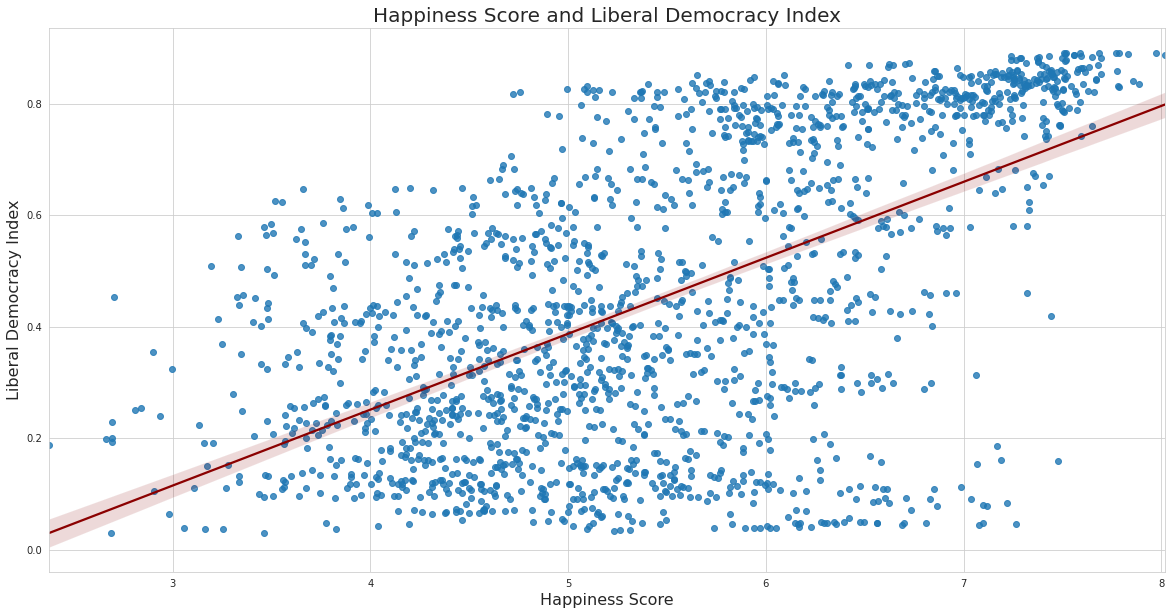

In [45]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))


# plot a regression line to show the trend
happiness_liberal_plot = sns.regplot(
    x='Life Ladder', 
    y='Liberal', 
    data=happiness_democracy_df, 
    scatter=True, 
    color='tab:blue',
    line_kws={'color':'darkred'}
)

happiness_liberal_plot.set_title('Happiness Score and Liberal Democracy Index', fontsize=20)
happiness_liberal_plot.set_xlabel('Happiness Score', fontsize=16)
happiness_liberal_plot.set_ylabel('Liberal Democracy Index', fontsize=16)
plt.show()

This plot shows a positive relationship between happiness score and liberal democracy index.

The liberal component protects the subjects from tyranny of their rulers. Liberal democracy includes the protection of the rights of any individual or minority through strong enforcement of law and policies that limits power of ruler

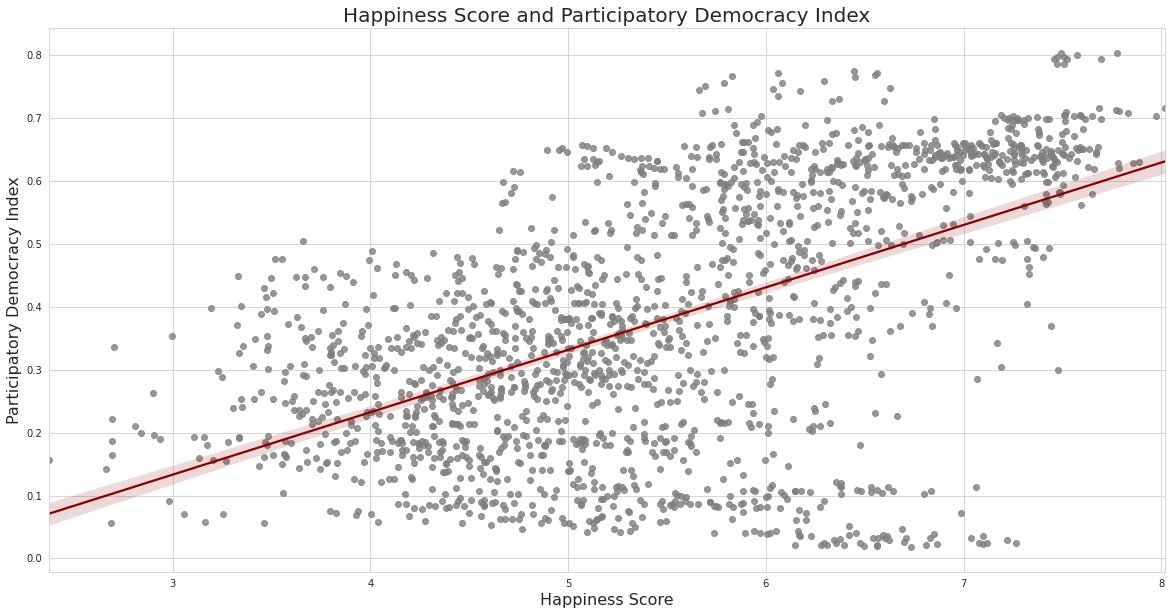

In [46]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
happiness_participatory_plot = sns.regplot(
    x='Life Ladder', 
    y='Participatory', 
    data=happiness_democracy_df, 
    scatter=True, 
    color='tab:gray',
    line_kws={'color':'darkred'}
)

happiness_participatory_plot.set_title('Happiness Score and Participatory Democracy Index', fontsize=20)
happiness_participatory_plot.set_xlabel('Happiness Score', fontsize=16)
happiness_participatory_plot.set_ylabel('Participatory Democracy Index', fontsize=16)
plt.show()

This plot shows a positive relationship between happiness score and participatory democracy index.

The participatory component elicits non-electoral and active political participation from the citizens. This includes participation in civil society organizations (CSO) and Non-governmental Organizations (NGO). Such organizations focus on different advocacies such protection of civil rights and protection of the environment. 
`insert specific examples in the philippines or anything na sikat`

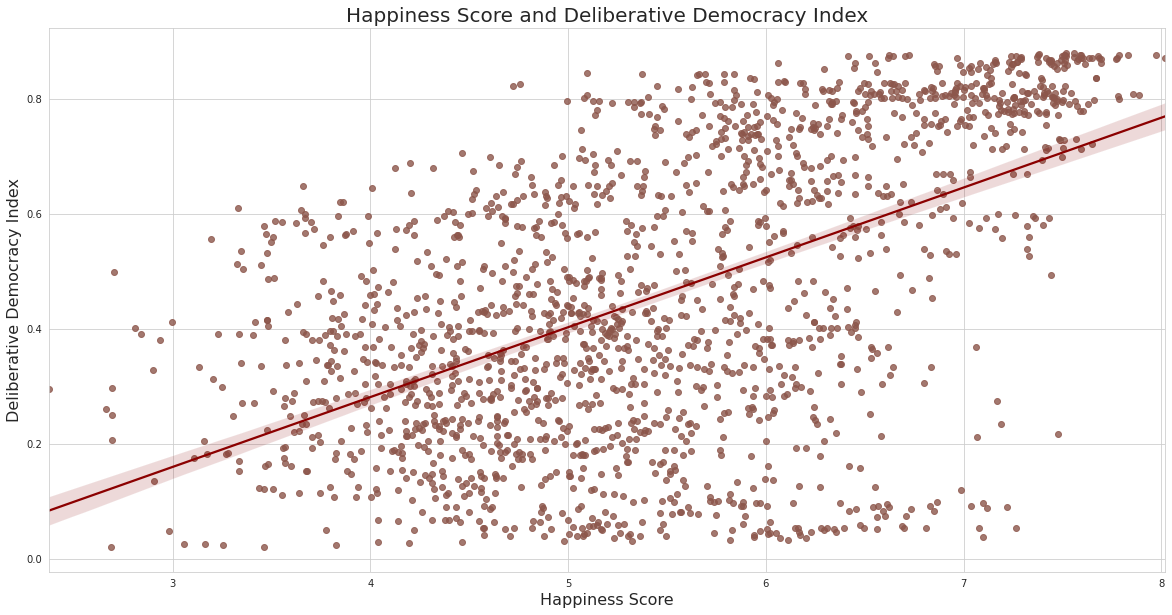

In [47]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))


# plot a regression line to show the trend
happiness_deliberative_plot = sns.regplot(
    x='Life Ladder', 
    y='Deliberative', 
    data=happiness_democracy_df, 
    scatter=True, 
    color='tab:brown',
    line_kws={'color':'darkred'}
)

happiness_deliberative_plot.set_title('Happiness Score and Deliberative Democracy Index', fontsize=20)
happiness_deliberative_plot.set_xlabel('Happiness Score', fontsize=16)
happiness_deliberative_plot.set_ylabel('Deliberative Democracy Index', fontsize=16)
plt.show()

This plot shows a positive relationship between happiness score and deliberative democracy index.

The deliberative component pursuits the legitimacy of political decisions for the sake of the public good. Such decisions are carried out with great significance and respect to all parties involved rather than for the benefit of a minority, or because of an emotional appeal. A territory that embodies deliberative democracy does not coerce its people into accepting political decisions.

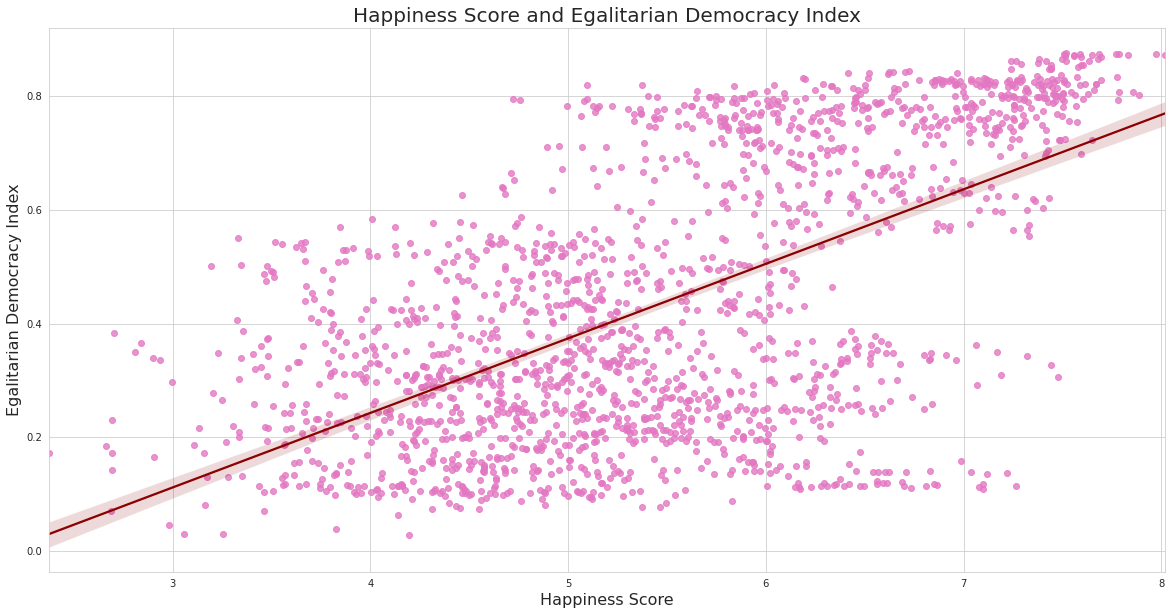

In [48]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
happiness_egalitarian_plot =sns.regplot(
    x='Life Ladder', 
    y='Egalitarian', 
    data=happiness_democracy_df, 
    scatter=True, 
    color='tab:pink',
    line_kws={'color':'darkred'}
)

happiness_egalitarian_plot.set_title('Happiness Score and Egalitarian Democracy Index', fontsize=20)
happiness_egalitarian_plot.set_xlabel('Happiness Score', fontsize=16)
happiness_egalitarian_plot.set_ylabel('Egalitarian Democracy Index', fontsize=16)
plt.show()

This plot shows a positive relationship between happiness score and egalitarian democracy index.

The egalitarian component enforces the exercise of formal rights and liberties to fight material and immaterial inequalities. 
..... a more equal distribution of resources, education, and health across various groups should enhance 
political equality.
`explain and give examples of material and immaterial resources`

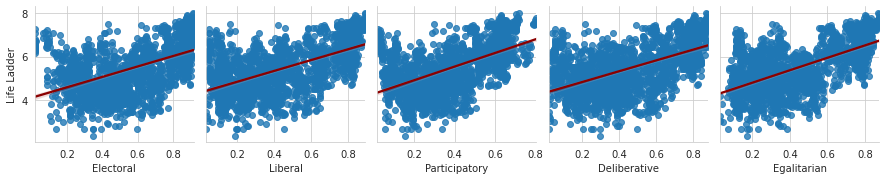

In [49]:
x = ['Electoral', 'Liberal', 'Participatory', 'Deliberative', 'Egalitarian']
y = ['Life Ladder']

happiness_democracy_summary_plot = sns.pairplot(
    data=happiness_democracy_df, 
    x_vars=x,
    y_vars=y,
    diag_kind = None,
    kind='reg',
    plot_kws={'line_kws':{'color':'darkred'}}
)

plt.show()

In summary, the indices for the five components of demomcracy all had positive correlation with the happiness score (life ladder). While the plot shows many records having high happiness score despite having low democracy index values, the regression line tells us that the great majority of records with high democracy index values have higher happiness scores.

In [50]:
# mean democracy (mean of 5 components)
average_democracy_df = happiness_democracy_df.copy(deep=False)
col = average_democracy_df.loc[: , "Electoral":"Egalitarian"]
average_democracy_df['mean_democracy'] = col.mean(axis=1)
average_democracy_df.head()

,Country Name,Year,Life Ladder,Electoral,Liberal,Participatory,Deliberative,Egalitarian,mean_democracy
0,Afghanistan,2008,3.724,0.403,0.228,0.160,0.346,0.232,0.2738
1,Afghanistan,2009,4.402,0.391,0.226,0.158,0.339,0.231,0.2690
2,Afghanistan,2010,4.758,0.374,0.222,0.151,0.331,0.224,0.2604
3,Afghanistan,2011,3.832,0.375,0.223,0.151,0.336,0.225,0.2620
4,Afghanistan,2012,3.783,0.380,0.224,0.154,0.338,0.226,0.2644


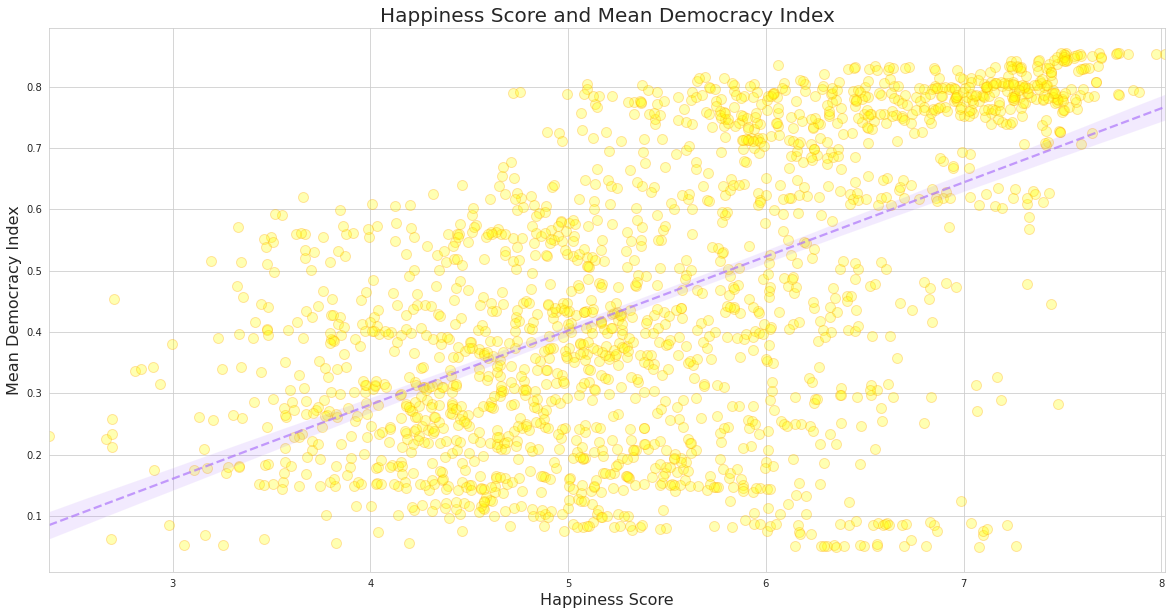

In [51]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

average_democracy_plot = sns.scatterplot(
    data=average_democracy_df, 
    ax=ax,
    x='Life Ladder', 
    y='mean_democracy',
    alpha=0.3,
    s=100,
    linewidth=1,
    edgecolor='orange',
    color='yellow' 
)

# plot a regression line to show the trend
sns.regplot(
    x='Life Ladder', 
    y='mean_democracy', 
    data=average_democracy_df,  
    scatter=False, 
    color='#ad75fa', #ad75fa
    line_kws={'ls':'--', 'alpha':0.7},
    #robust=True
)

# plot a regression line to show the trend
# average_democracy_plot = sns.regplot(
#     x='Life Ladder', 
#     y='mean_democracy', 
#     data=average_democracy_df, 
#     scatter=True, 
#     color='tab:purple',
#     line_kws={'color':'darkred'},
# )

average_democracy_plot.set_title('Happiness Score and Mean Democracy Index', fontsize=20)
average_democracy_plot.set_xlabel('Happiness Score', fontsize=16)
average_democracy_plot.set_ylabel('Mean Democracy Index', fontsize=16)
plt.show()

In [52]:
# mean of yearly ladder scores and democracy indices for each country
country_average = average_democracy_df.groupby('Country Name', as_index=False).agg(
    ladder=('Life Ladder', 'mean'),
    electoral=('Electoral', 'mean'),
    liberal=('Liberal', 'mean'),
    participatory=('Participatory', 'mean'),
    deliberative=('Deliberative', 'mean'),
    egalitarian=('Egalitarian', 'mean'),
    mean_democracy=('mean_democracy', 'mean'),
)

country_average.head()

,Country Name,ladder,electoral,liberal,participatory,deliberative,egalitarian,mean_democracy
0,Afghanistan,3.594667,0.369583,0.214583,0.156167,0.321417,0.209250,0.254200
1,Albania,5.019385,0.527692,0.430308,0.334692,0.313000,0.378231,0.396785
2,Algeria,5.389875,0.310625,0.158000,0.122125,0.215500,0.259625,0.213175
3,Angola,4.420250,0.307250,0.163500,0.083750,0.125250,0.109250,0.157800
4,Argentina,6.310133,0.779467,0.611000,0.521667,0.593267,0.618600,0.624800


In [53]:
top_country_democracy = country_average.sort_values("mean_democracy", ascending=False)
top_country_democracy.head(10)

,Country Name,ladder,electoral,liberal,participatory,deliberative,egalitarian,mean_democracy
36,Denmark,7.680400,0.914333,0.888467,0.706667,0.875000,0.872667,0.851427
130,Switzerland,7.548300,0.896000,0.853600,0.796000,0.862600,0.827800,0.847200
129,Sweden,7.369467,0.913133,0.880667,0.666333,0.868133,0.845333,0.834720
103,Norway,7.512400,0.897200,0.862300,0.649100,0.870600,0.855900,0.827020
31,Costa Rica,7.179357,0.907071,0.856071,0.685500,0.858786,0.820500,0.825586
49,Germany,6.843133,0.894667,0.857267,0.649933,0.864067,0.833200,0.819827
146,Uruguay,6.261867,0.893667,0.821067,0.749333,0.837733,0.772933,0.814947
98,New Zealand,7.310286,0.892786,0.844214,0.695714,0.778643,0.797500,0.801771
45,Finland,7.597154,0.883000,0.840769,0.633462,0.816769,0.816385,0.798077
12,Belgium,6.981500,0.889571,0.823929,0.637429,0.806429,0.827000,0.796871


In [54]:
bot_country_democracy = country_average.sort_values("mean_democracy", ascending=True)
bot_country_democracy.head(10)

,Country Name,ladder,electoral,liberal,participatory,deliberative,egalitarian,mean_democracy
116,Saudi Arabia,6.538133,0.017800,0.047600,0.023133,0.054400,0.115533,0.051693
131,Syria,4.017000,0.143143,0.042286,0.056571,0.026143,0.088714,0.071371
143,United Arab Emirates,6.800462,0.081385,0.085000,0.029462,0.088462,0.133077,0.083477
111,Qatar,6.569200,0.082800,0.106800,0.036200,0.088000,0.120200,0.086800
74,Laos,5.003000,0.102333,0.093556,0.100667,0.049778,0.108889,0.091044
9,Bahrain,6.001727,0.160364,0.051909,0.055818,0.063818,0.124000,0.091182
147,Uzbekistan,5.791615,0.172769,0.043769,0.045923,0.077615,0.141000,0.096215
133,Tajikistan,4.938600,0.201733,0.057400,0.070600,0.071867,0.118200,0.103960
127,Sudan,4.378600,0.224200,0.068200,0.102200,0.066200,0.073000,0.106760
8,Azerbaijan,4.941000,0.205786,0.066786,0.076786,0.053429,0.135286,0.107614


In [55]:
country_average.shape

(153, 8)

There are 153 countries in the dataset. We compare the top 76 and the bottom 77 countries for mean democracy and for happiness score and compare their means.

In [56]:
top_country_democracy.head(76).mean()

ladder            5.989163
electoral         0.766786
liberal           0.659197
participatory     0.531705
deliberative      0.649994
egalitarian       0.619779
mean_democracy    0.645492
dtype: float64

In [57]:
bot_country_democracy.head(77).mean()

ladder            4.829865
electoral         0.347222
liberal           0.216998
participatory     0.202749
deliberative      0.243604
egalitarian       0.227957
mean_democracy    0.247706
dtype: float64

Text(0.5, 1.0, 'Mean Happiness Score of Top 76 vs Bottom 77 Countries Ranked by Mean Democracy Index')

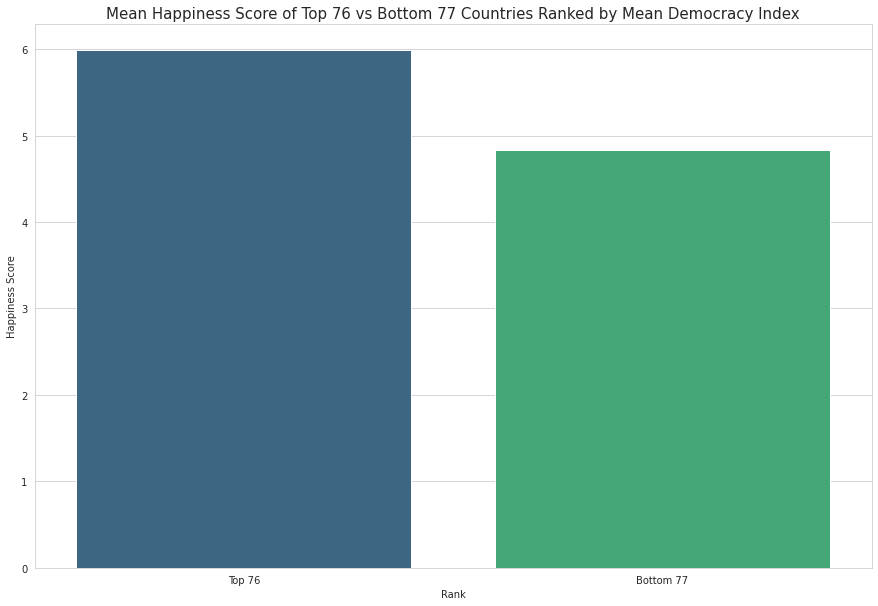

In [58]:
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(15, 10))

top = pd.Series(top_country_democracy['ladder'].head(76).mean())
bot = pd.Series(bot_country_democracy['ladder'].head(77).mean())
top_vs_bot = pd.concat([top, bot], axis=0)
top_vs_bot = pd.DataFrame(top_vs_bot)
top_vs_bot.columns = ['Happiness Score']
top_vs_bot.index = ['Top 76', 'Bottom 77']
top_vs_bot.index.name = "Rank"
top_vs_bot.reset_index(inplace=True)
top_vs_bot.rename(columns = {'index':'Rank'})

top_vs_bot_plot = sns.barplot(x='Rank', y="Happiness Score",palette='viridis', data=top_vs_bot)
top_vs_bot_plot.set_title('Mean Happiness Score of Top 76 vs Bottom 77 Countries Ranked by Mean Democracy Index', fontsize=15)


<AxesSubplot:xlabel='Rank', ylabel='ladder'>

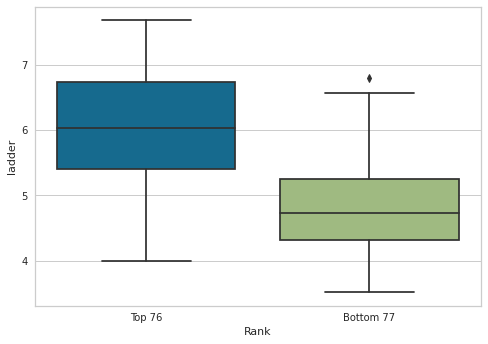

In [117]:
top_country_democracy = country_average.sort_values("mean_democracy", ascending=False)
top_country_democracy = top_country_democracy.reset_index() 
top_country_democracy = top_country_democracy.drop(columns=['index'])

# Label the rank 1 to 76 as 'Top 76', and rank 77 to 153 as 'Bottom 77'
top_country_democracy['Rank'] = np.where(top_country_democracy.iloc[0:153].index < 76, 'Top 76', 'Bottom 77')
sns.boxplot(x="Rank", y="ladder", data=top_country_democracy)

In [94]:
top_country_democracy

,Country Name,ladder,electoral,liberal,participatory,deliberative,egalitarian,mean_democracy,Rank
36,Denmark,7.680400,0.914333,0.888467,0.706667,0.875000,0.872667,0.851427,Top 76
130,Switzerland,7.548300,0.896000,0.853600,0.796000,0.862600,0.827800,0.847200,Bottom 77
129,Sweden,7.369467,0.913133,0.880667,0.666333,0.868133,0.845333,0.834720,Bottom 77
103,Norway,7.512400,0.897200,0.862300,0.649100,0.870600,0.855900,0.827020,Bottom 77
31,Costa Rica,7.179357,0.907071,0.856071,0.685500,0.858786,0.820500,0.825586,Top 76
...,...,...,...,...,...,...,...,...,...
74,Laos,5.003000,0.102333,0.093556,0.100667,0.049778,0.108889,0.091044,Top 76
111,Qatar,6.569200,0.082800,0.106800,0.036200,0.088000,0.120200,0.086800,Bottom 77
143,United Arab Emirates,6.800462,0.081385,0.085000,0.029462,0.088462,0.133077,0.083477,Bottom 77
131,Syria,4.017000,0.143143,0.042286,0.056571,0.026143,0.088714,0.071371,Bottom 77


The top 76 countries in terms of mean democracy index have a mean happiness score of 5.989 which is higher than the mean happiness score of the bottom 77 which is 4.829.

In [59]:
top_country_happiness = country_average.sort_values("ladder", ascending=False)
bot_country_happiness = country_average.sort_values("ladder", ascending=True)

In [60]:
top_country_happiness.head(76).mean()

ladder            6.311973
electoral         0.679296
liberal           0.578578
participatory     0.471454
deliberative      0.569717
egalitarian       0.560585
mean_democracy    0.571926
dtype: float64

In [61]:
bot_country_happiness.head(77).mean()

ladder            4.511247
electoral         0.433575
liberal           0.296570
participatory     0.262217
deliberative      0.322839
egalitarian       0.286381
mean_democracy    0.320317
dtype: float64

Text(0.5, 1.0, 'Mean Democracy Score of Top 76 vs Bottom 77 Countries Ranked by Happiness Score')

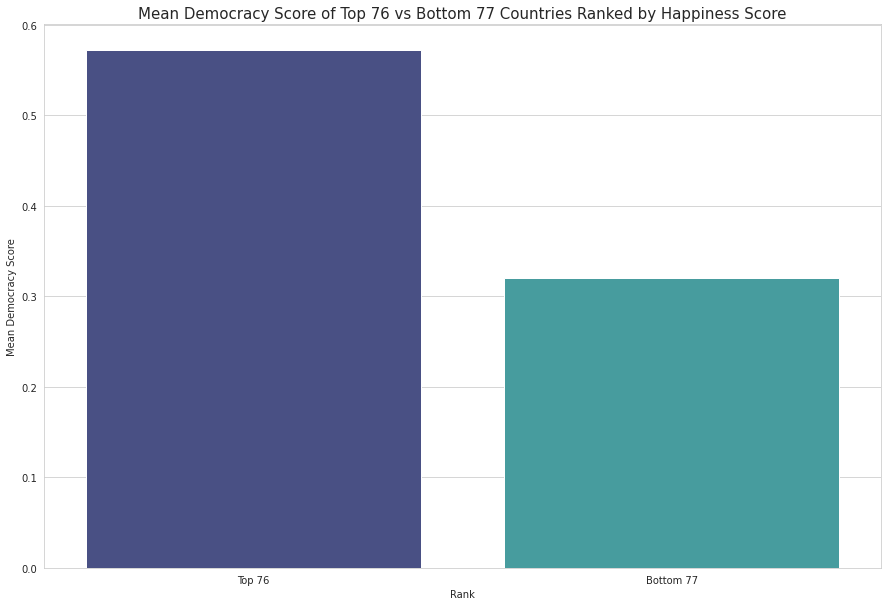

In [62]:
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(15, 10))

top_h = pd.Series(top_country_happiness['mean_democracy'].head(76).mean())
bot_h = pd.Series(bot_country_happiness['mean_democracy'].head(77).mean())
top_vs_bot_h = pd.concat([top_h, bot_h], axis=0)
top_vs_bot_h = pd.DataFrame(top_vs_bot_h)
top_vs_bot_h.columns = ['Mean Democracy Score']
top_vs_bot_h.index = ['Top 76', 'Bottom 77']
top_vs_bot_h.index.name = 'Rank'
top_vs_bot_h.reset_index(inplace=True)
top_vs_bot_h.rename(columns = {'index':'Rank'})

top_vs_bot_h_plot = sns.barplot(x='Rank', y="Mean Democracy Score", palette='mako',data=top_vs_bot_h)
top_vs_bot_h_plot.set_title('Mean Democracy Score of Top 76 vs Bottom 77 Countries Ranked by Happiness Score', fontsize=15)

The top 76 countries in terms of happiness score have a mean democracy index of 0.571 which is higher than the mean democracy index of the bottom 77 which is 0.320.

In [ ]:
top_country_happiness = country_average.sort_values("ladder", ascending=False)
top_country_happiness = top_country_democracy.reset_index() 
top_country_happiness = top_country_democracy.drop(columns=['index'])

# Label the rank 1 to 76 as 'Top 76', and rank 77 to 153 as 'Bottom 77'
top_country_democracy['Rank'] = np.where(top_country_happiness.iloc[0:153].index < 76, 'Top 76', 'Bottom 77')
sns.boxplot(x="Rank", y="ladder", data=top_country_happiness)

### 3.4 What is the relationship between democracy and degree of freedom?

Democracy can affect a country in many different ways. This includes a country's GDP, lifespan, and education levels. Aside from these aspects, we want to know if the democracy of a country can also affect its level of freedom.

As stated earlier, the data for democracy was taken from the V-Dem dataset, wherein the democracy of a country is measured by 5 principles: electoral, liberal, participatory, deliberative, and egalitarian. Freedom, on the other hand, refers to the national average of whether the citizens of a country are satisfied with their freedom to choose what they do with their lives.

In [63]:
democracy_freedom = main_df[['Freedom to make life choices', 'Electoral', 'Liberal', 'Participatory', 'Deliberative', 'Egalitarian']]
democracy_freedom = democracy_freedom.rename(columns={'Freedom to make life choices':'Freedom'})
democracy_freedom.head()

,Freedom,Electoral,Liberal,Participatory,Deliberative,Egalitarian
0,0.718,0.403,0.228,0.160,0.346,0.232
1,0.679,0.391,0.226,0.158,0.339,0.231
2,0.600,0.374,0.222,0.151,0.331,0.224
3,0.496,0.375,0.223,0.151,0.336,0.225
4,0.531,0.380,0.224,0.154,0.338,0.226


Now that we have the data needed, let's plot the relationship of these variables.

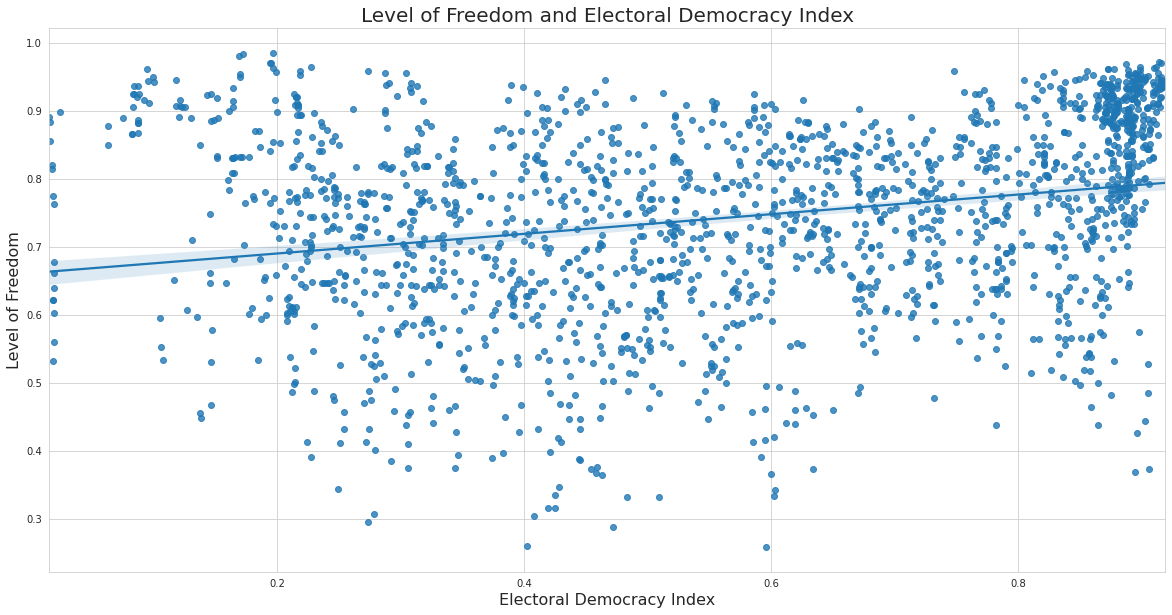

In [64]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
freedom_electoral_plot = sns.regplot(
    x='Electoral', 
    y='Freedom', 
    data=democracy_freedom
)

freedom_electoral_plot.set_title('Level of Freedom and Electoral Democracy Index', fontsize=20)
freedom_electoral_plot.set_xlabel('Electoral Democracy Index', fontsize=16)
freedom_electoral_plot.set_ylabel('Level of Freedom', fontsize=16)
plt.show()

The electoral democracy index refers to the general public's right to vote and whether they practice this right. In the plot above, we can see that the higher the electoral democracy index is, the higher the country's level of freedom is. However, the slope of the regression line is not very steep, which means that the relationship is not very strong.

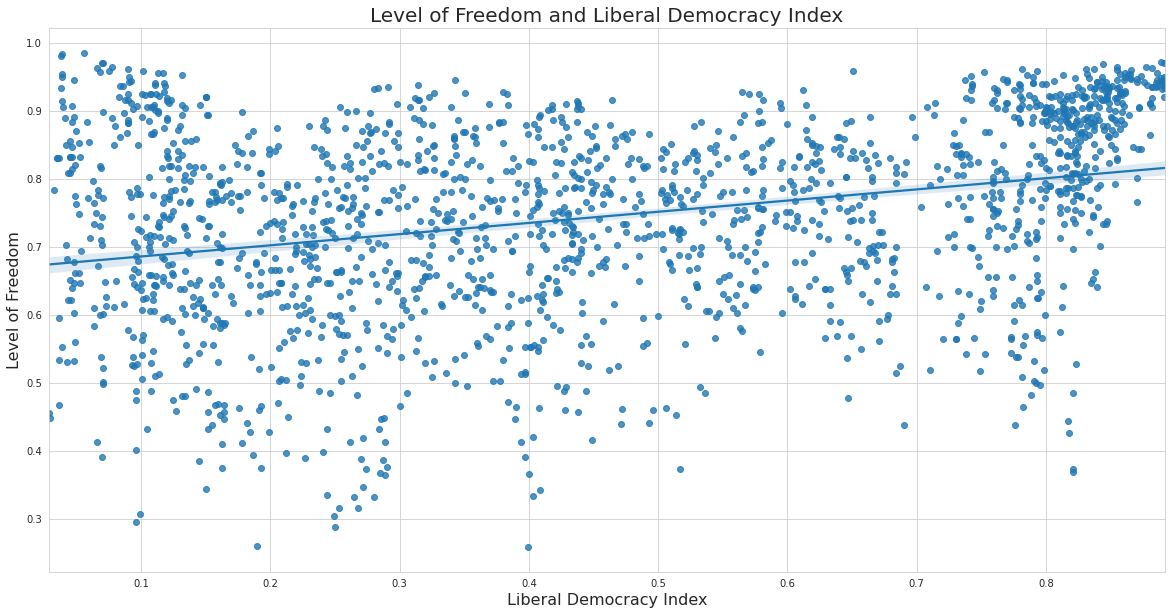

In [65]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
freedom_liberal_plot = sns.regplot(
    x='Liberal', 
    y='Freedom', 
    data=democracy_freedom
)

freedom_liberal_plot.set_title('Level of Freedom and Liberal Democracy Index', fontsize=20)
freedom_liberal_plot.set_xlabel('Liberal Democracy Index', fontsize=16)
freedom_liberal_plot.set_ylabel('Level of Freedom', fontsize=16)
plt.show()

Liberal democracy emphasizes on ensuring that power is not being abused and proper enforcement of the law is done. Seeing the graph above, we can say that the relationship between the liberal democracy index and a country's freedom is not very strong. Like the relationship of electoral democracy and freedom, the relationship between the liberal democracy index and a country's freedom is slightly positive and the data points are quite spread out.

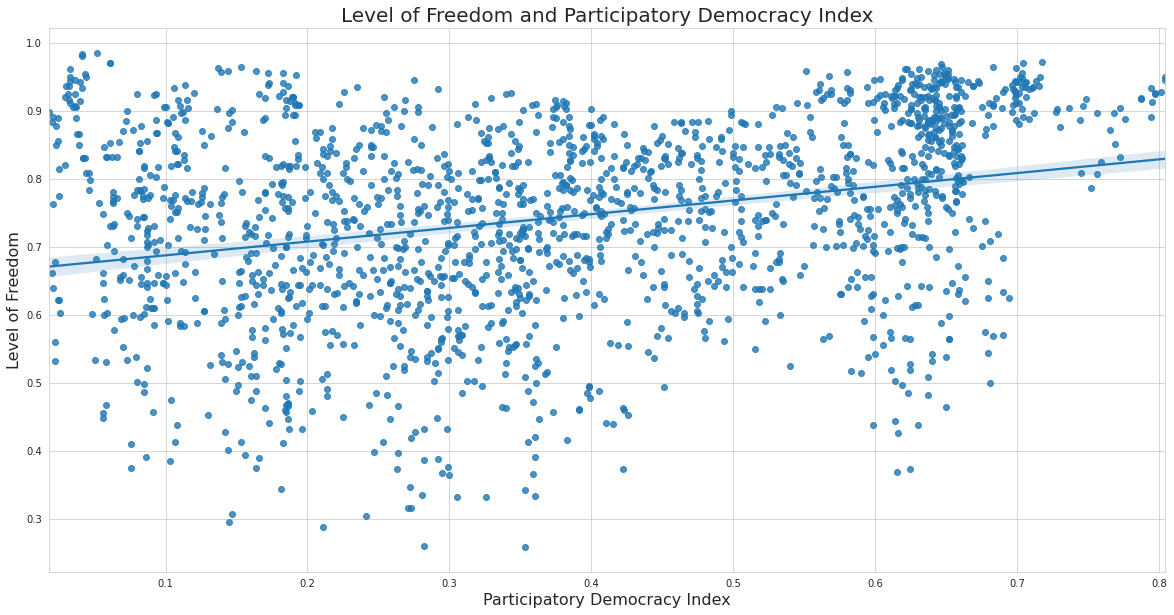

In [66]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
freedom_participatory_plot = sns.regplot(
    x='Participatory', 
    y='Freedom', 
    data=democracy_freedom
)

freedom_participatory_plot.set_title('Level of Freedom and Participatory Democracy Index', fontsize=20)
freedom_participatory_plot.set_xlabel('Participatory Democracy Index', fontsize=16)
freedom_participatory_plot.set_ylabel('Level of Freedom', fontsize=16)
plt.show()

The relationship between the participatory democracy index and a country's level of freedom is slightly positive. Participatory democracy indicates that citizens have the right to make political decisions. This means that a country that allows its citizens to participate in political decisions and gives them a wider control in the decision making process has a higher level of freedom.

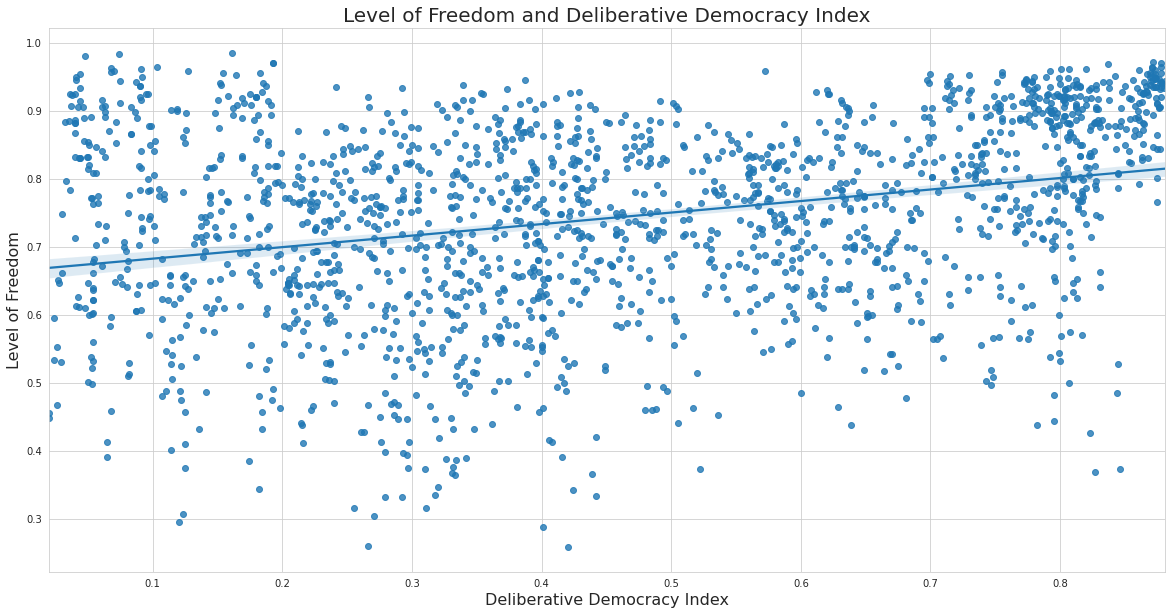

In [67]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
freedom_deliberative_plot = sns.regplot(
    x='Deliberative', 
    y='Freedom', 
    data=democracy_freedom
)

freedom_deliberative_plot.set_title('Level of Freedom and Deliberative Democracy Index', fontsize=20)
freedom_deliberative_plot.set_xlabel('Deliberative Democracy Index', fontsize=16)
freedom_deliberative_plot.set_ylabel('Level of Freedom', fontsize=16)
plt.show()

The deliberative approach is a method in the decision making process wherein all options are thoughtfully weighed and seen from multiple perspectives. This allows the decision to be made with the thoughts and opinions of all parties to be taken into account. As we can see from the graph above, the deliberative democracy index has a slight effect to a country's level of freedom wherein as the deliberative democracy index increases, the country's level of freedom also increases.

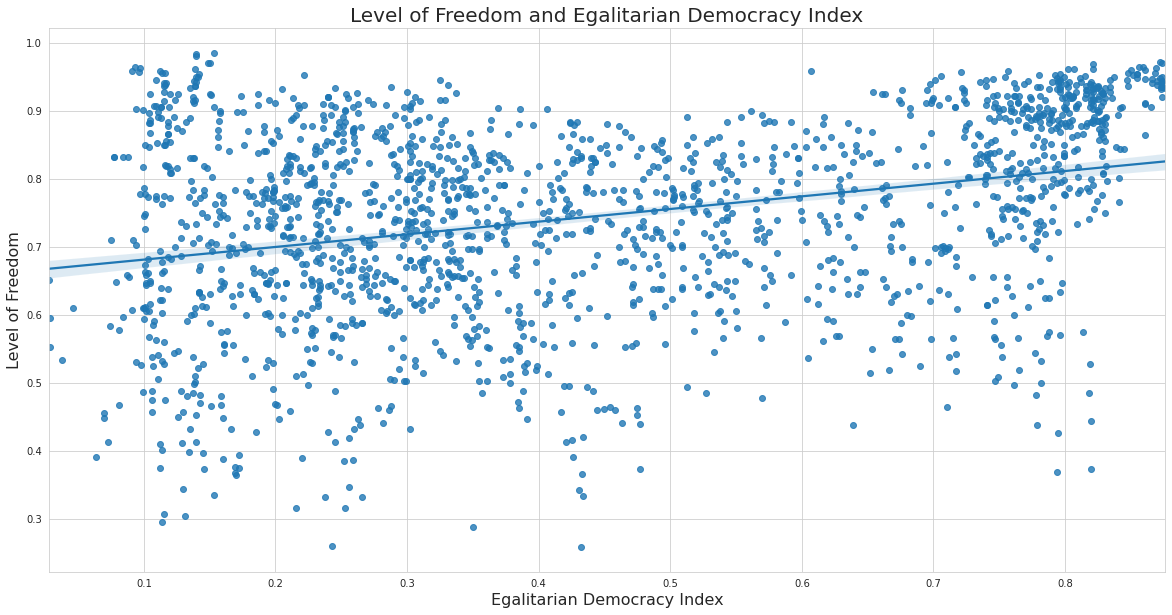

In [68]:
# set styles and dimensions
sns.set_style("whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 10))

# plot a regression line to show the trend
freedom_egalitarian_plot = sns.regplot(
    x='Egalitarian', 
    y='Freedom', 
    data=democracy_freedom
)

freedom_egalitarian_plot.set_title('Level of Freedom and Egalitarian Democracy Index', fontsize=20)
freedom_egalitarian_plot.set_xlabel('Egalitarian Democracy Index', fontsize=16)
freedom_egalitarian_plot.set_ylabel('Level of Freedom', fontsize=16)
plt.show()

The egalitarian democracy index also has a slightly positive relationship with a country's level of freedom wherein as the egalitarian democracy index increases, the level of freedom also increases. This refers to the political equality of a country wherein each individual's rights are respected and everyone is treated equally.



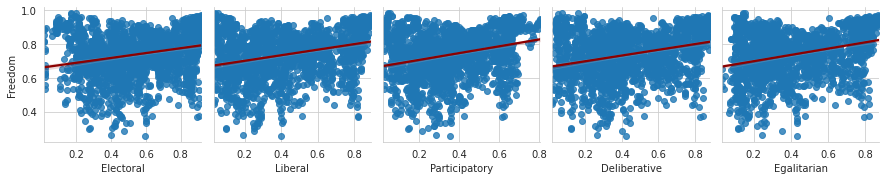

In [69]:
x = ['Electoral', 'Liberal', 'Participatory', 'Deliberative', 'Egalitarian']
y = ['Freedom']

g = sns.pairplot(
    democracy_freedom, 
    x_vars=x,
    y_vars=y,
    diag_kind = None,
    kind='reg',
    plot_kws={'line_kws':{'color':'darkred'}}
)

plt.show()

As we can see in the graph above, the relationship of each of the democracy principles with a country's level of freedom are quite similar with one another. We can see that the data points are quite spread out but still show that they all have a slightly positive relationship wherein as the democracy index increases, the freedom also increases.

### 3.5 What is the relationship between a country’s GDP per capita and happiness?

Gross Domestic product, as defined by Marginal Revolution University, is a metric used to measure the market value of all finished goods and services produced for a year within a country. This will show how much the people worked and produced, and their average earnings for that certain amount of time. This could also be a representation of the standard of living in that area.

To show the relationship of this two variables, we plot the values in a graph. The x-axis is for the Log GDP per capita while the y-axis is for the happiness score.

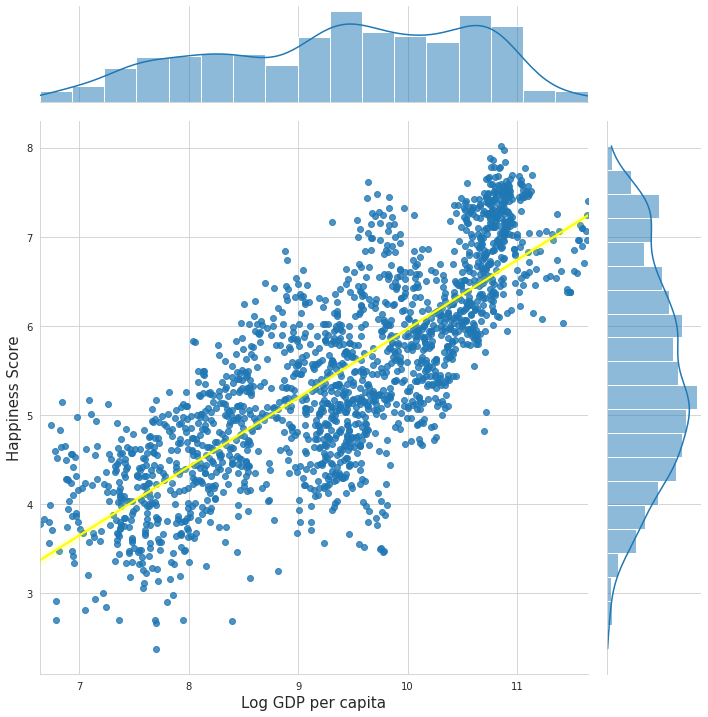

In [70]:
GvH_df = sns.jointplot(
    x=main_df['Log GDP per capita'], 
    y= main_df['Life Ladder'],
    data=main_df,
    kind='reg',
    height=10,
    joint_kws={'line_kws':{'color':'yellow'}}
)

GvH_df.set_axis_labels('Log GDP per capita', 'Happiness Score', fontsize=15)

plt.show()

This yellow line we see here is increasing and has a positive slope, which means that the country’s GDP and happiness score is positively correlated. When the value of the GDP is low, the value of the happiness score is likewise low, and when one variable is high, so is the other variable. We can say based on this graph, that the GDP of a country positively affects their happiness score.

### Inferential Question: Is the rate of change in happiness as Social Support changes the same as the rate of change in happiness as Liberal Democracy index?

We’ve established that happiness tends to be higher when indices of democracy, GDP, social perceptions of freedom and generosity are higher. Still, we don't know if the social factors or the democratic factors should be focused on for a country to be happy. So now, we want to infer which between social support or liberal democracy index affects happiness more. Social Support and Liberal Democracy Index were chosen because they represent the values best, Social Support being the general supportiveness of friends and family in a community, and Liberal Democracy Index measures whether the government allows freedom, the essence of democracy. Essentially, we ask whether it’s better to have good friends or good leaders.

#### Model Selection

To answer this, we create a machine learning model that will learn the relationship happiness has with social support and the liberal democracy index. We used a Linear Regression because it learns quick, and is simple enough that it can be easy to interpret, which is important so that we can infer the relationships of the features, instead of having a black box model that just returns predictions. We import it from sklearn.

In [71]:
# import LinearRegression package
from sklearn.linear_model import LinearRegression

#### Feature Selection

The dataset will be reduced to 2 features concerned so that they can be specifically observed. All records will be used to train the model so that there is a stronger basis for the inference.

Three seprate feature sets will be created to train 3 different models. The 1st feature set will have both `Social support` and `Liberal`. The 2nd only has `Social support`, and the 3rd only `Liberal`

In [72]:
# Feature set with social support and liberal for first model
X = main_df[["Social support", "Liberal"]]

# Feature set with social support for second model
X_social = array(main_df["Social support"])

# Feature set with liberal for third model
X_liberal = array(main_df["Liberal"])

All 3 models will use the same ground truth set, to predict the happiness score or `Life Ladder`

In [73]:
y = main_df["Life Ladder"]

The models will be created, and fit to the corresponding feature sets.

In [74]:
# Model fit to both social support and liberal
reg = LinearRegression().fit(X, y)

# Model fit to social support
reg_s = LinearRegression().fit(X_social.reshape(-1, 1), y)

#Model fit to liberal
reg_l = LinearRegression().fit(X_liberal.reshape(-1, 1), y)

#### Model Validation

To validate the models, residual analysis will be performed. A residual is the difference between the predicted value and the ground truth value. Residual analysis involves plotting the residuals and analyzing the resultant patterns created, and can inform whether the model is fit to the data. In general, randomly distributed residuals imply that the model is a good fit. Residuals that form a U or inverted-U pattern however can be better modeled with a non-linear model.

The yellowbrick ResidualsPlot package will be used to visualize the residuals for analysis.

In [75]:
# install and import yellowbrick ResidualsPLot package
!pip install yellowbrick
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

The residuals for the model trained with both features has random distribution, and thus fits the data decently.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


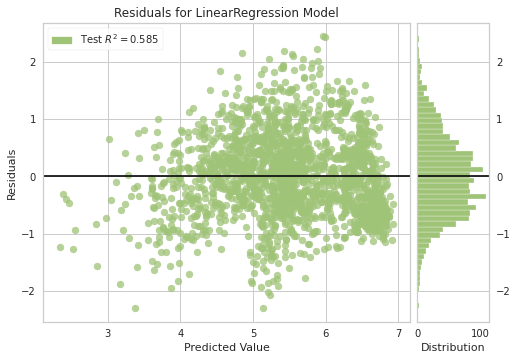

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [76]:
visualizer = ResidualsPlot(reg)
visualizer.score(X, y)  
visualizer.show()

The residuals for the model trained with Social Support is random , but is approaching an inverse-U pattern. Thus, it may be better modeled with a non-linear model. But it is still somewhat random, and to have the 3 models consistent, it will still be used going forward.

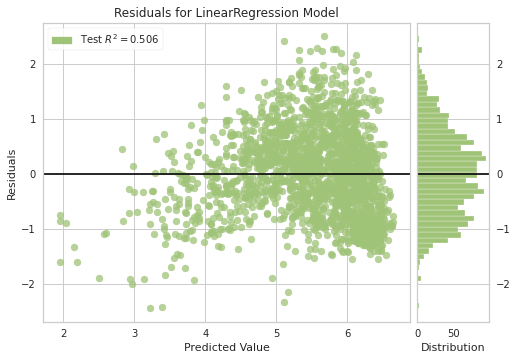

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
visualizer = ResidualsPlot(reg_s)
visualizer.score(X_social.reshape(-1, 1), y)
visualizer.show()

The residuals for the last model trained with Liberal Democracy Index has the most random distribution, and thus fits the data decently.

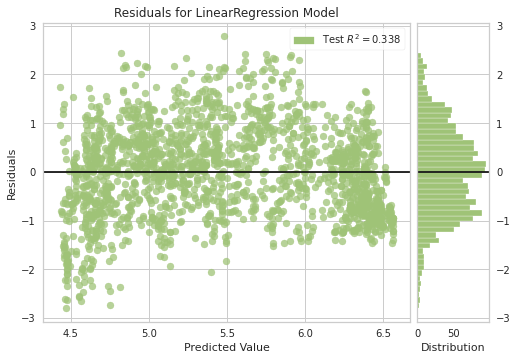

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [78]:
visualizer = ResidualsPlot(reg_l)
visualizer.score(X_liberal.reshape(-1, 1), y)
visualizer.show()

#### Inferenece

To infer how much variations in happiness can be explained by the two features, we can obtain the models' **coefficients of determination** or R<sup>2</sup>. R<sup>2</sup> is defined as the difference between 1 and the quotient of the Residual Sum of Squares and the Total Sum of Squared Differences. It is a value from 0 to 1, and can be represented as a percentage, which explains how much of the variations in a dependent variable can be predicted by a set of independent variables. R<sup>2</sup> can be obtained using the `LinearRegression.score()` function 

In [79]:
# R2 for model with both features as percentage
reg_score = round(reg.score(X, y)*100,2)

# R2 for model with social support as percentage
reg_s_score = round(reg_s.score(X_social.reshape(-1, 1), y)*100,2)

# R2 for model with liberal democracy index as percentage
reg_l_score = round(reg_l.score(X_liberal.reshape(-1, 1), y)*100,2)

The scores are plotted on a bar graph so that they can be visualized and easily compared.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


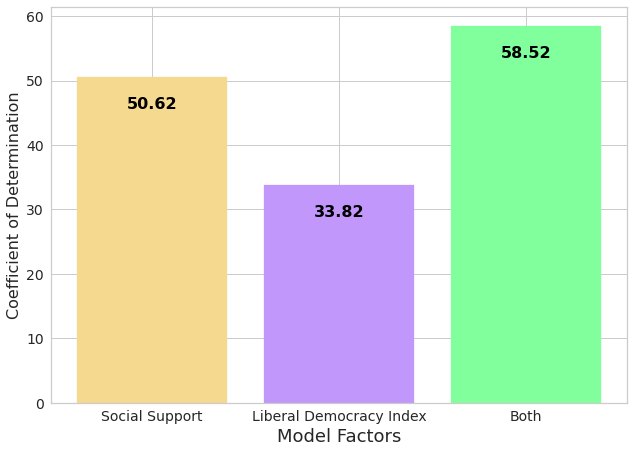

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = ['Social Support', 'Liberal Democracy Index', 'Both']
scores = [reg_s_score,reg_l_score,reg_score]
bar = ax.bar(features,scores)
bar[0].set_color("#f4d98f")
bar[1].set_color("#c197fb")
bar[2].set_color("#80ff9c")
plt.xlabel('Model Factors', fontsize=18)
plt.ylabel('Coefficient of Determination', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(scores):
    ax.text(i, v-5, str(v), color='black', fontweight='bold', fontsize=16, ha="center")
plt.show()

Social support alone can explain 50.62% of the variations in happiness. Liberal Democracy Index alone accounts for only 33.82%. We can say that changes in social support can better predict changes in happiness. Together, however, the factors can explain 58.52% of these variations. Thus, the features predict change in happiness when used together instead of individually.

We can look at how much the 1st model weighs each feature when making a prediction. 

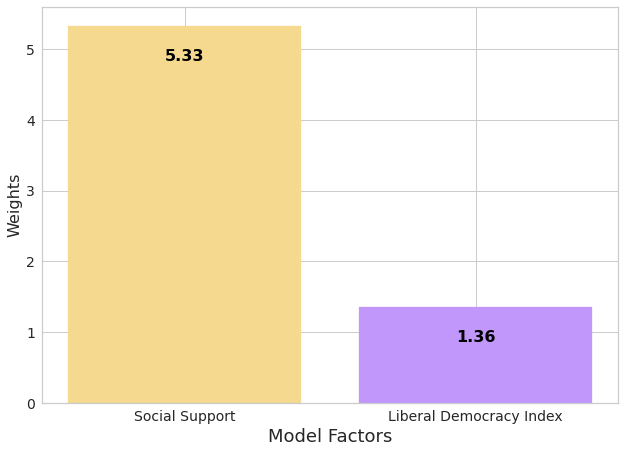

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = ['Social Support', 'Liberal Democracy Index']
weights = np.around(reg.coef_,2)
bar = ax.bar(features,weights)
bar[0].set_color("#f4d98f")
bar[1].set_color("#c197fb")
plt.xlabel('Model Factors', fontsize=18)
plt.ylabel('Weights', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(weights):
    ax.text(i, v-0.5, str(v), color='black', fontweight='bold', fontsize=16, ha="center")
plt.show()

Both factors positively affect happiness, but the model places about 3.92 times as much weight on Social Support than it does on the Liberal Democracy Index. Put simply, this means that an increase in social support increases happiness 3.92 times as much as the same increase in liberal democracy index, on average. Thus, it may be more beneficial to focus on increasing Social Support rather than Liberal Democracy Index to increase happiness score.


## So, how does a country become happy?

Based on our observations and analysis on the data, we conclude that a country is likely to be happy if it scores high on the various democracy indices and social factors. Both sets of factors correlate with higher happiness, so countries should strive to improve on both sets. 

If a factor should be prioritized, we infer from our models that a country with a population that supports each other would have a high happiness. People find happiness when they are in the company of supportive friends and family. It’s important to have a generous, free, supportive community. 

Still, this does not mean that the Liberal Democracy Index and other democracy indices should be ignored. Liberal Democracy Index also positively affects the happiness score. Ultimately, having both good friends and good leaders will always be best.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e85a25e-b451-4fe5-8d80-97da2208d760' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>